<h1>Описание данных</h1>

Таблица rest_data:

id — идентификатор объекта;

object_name — название объекта общественного питания;

chain — сетевой ресторан;

object_type — тип объекта общественного питания;

address — адрес;

number — количество посадочных мест.

<a id="preprocessing"> </a>
<h2>Загрузка данных и подготовка к анализу</h2>

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 10)

In [152]:
data = pd.read_csv('/datasets/rest_data.csv')
display(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Проверяем количество уникальных значений в столбцах

In [153]:
print(data['id'].nunique())
print(data['object_name'].nunique())
print(data['chain'].unique())
print(data['object_type'].unique())
data['address'].nunique()

15366
10393
['нет' 'да']
['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']


9108

Заменяем заглавные буквы на строчные

In [154]:
data['object_name'] = data['object_name'].str.lower()
data['address'] = data['address'].str.lower()
data['object_name'] = data['object_name'].str.replace('«','')
data['object_name'] = data['object_name'].str.replace('»','')
data['object_name'].value_counts()

столовая                         321
кафе                             278
шаурма                           250
шоколадница                      158
kfc                              155
                                ... 
кафе березка                       1
тоторо                             1
восточный пекарь                   1
базар-вокзал                       1
развлекательный центр semenov      1
Name: object_name, Length: 9840, dtype: int64

In [155]:
# Код ревьюера

pd.Series(['кафе «Шоколадница»']).replace('.*«([\w\s]+)»',r'\1',regex=True)

0    Шоколадница
dtype: object

Удаляем дубликаты

In [156]:
data = data.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  object
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 835.7+ KB


Объединяем исходную и временные таблицы по индексу, чтобы удалить строки с дублирующимися адресами

Вывод: строки приведены к нижнему регистру, удалены дубликаты строк.

<h2>Анализ данных</h2>

Определим соотношение видов объектов общественного питания по количеству

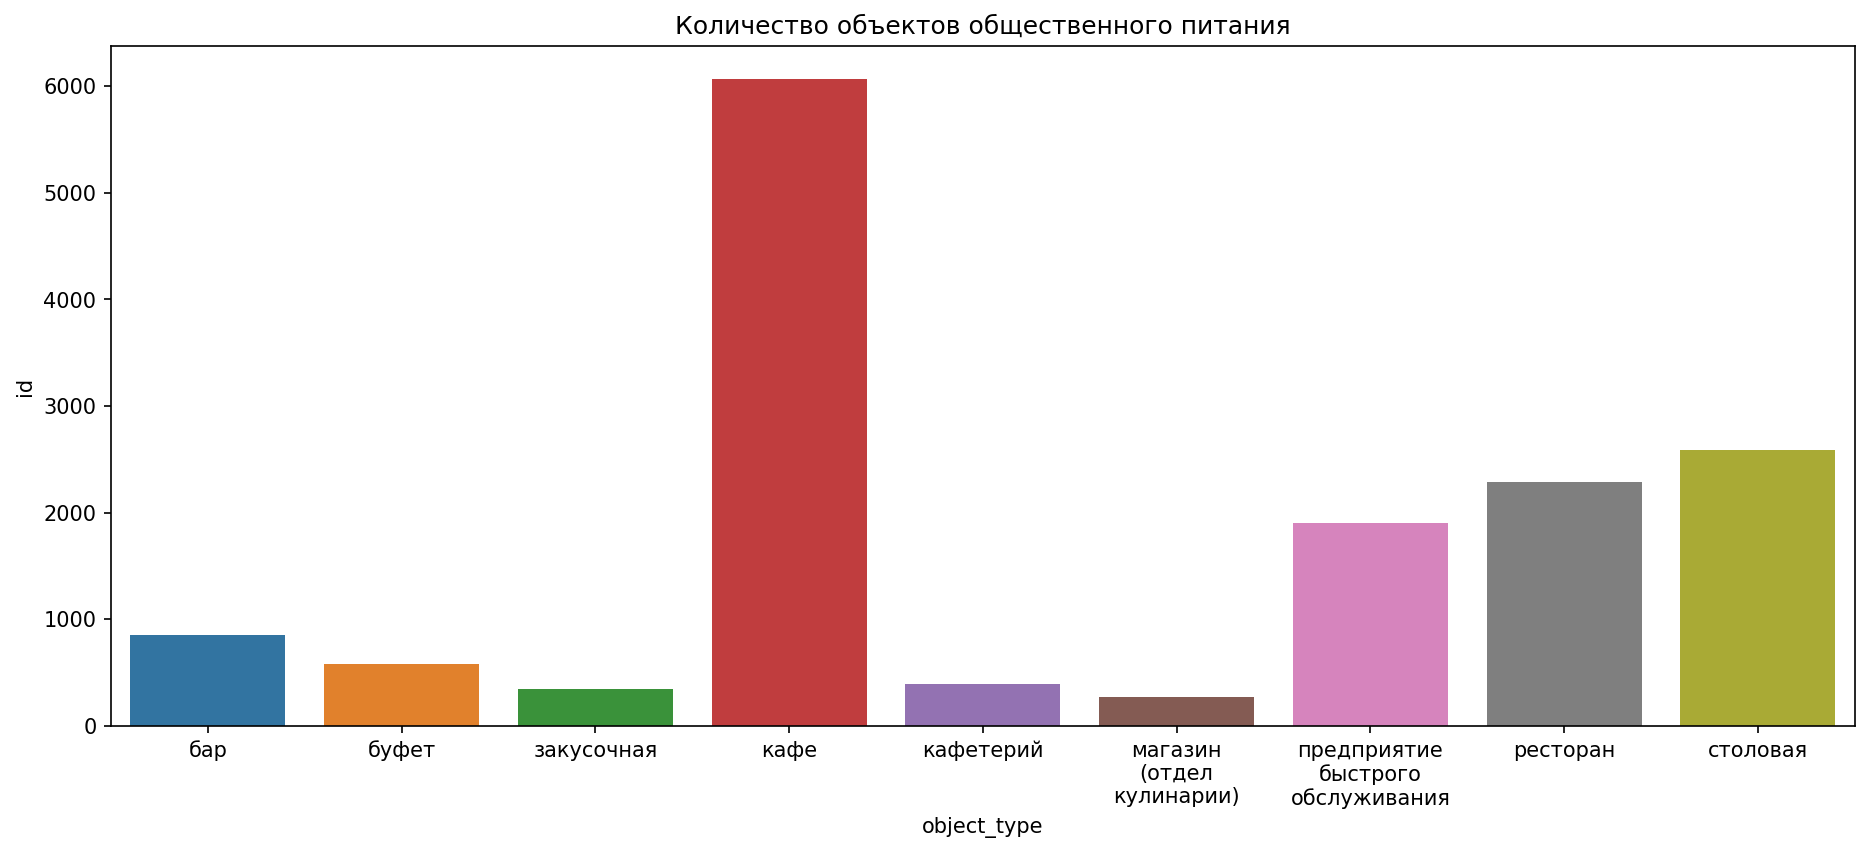

In [158]:
fig, ax = plt.subplots(figsize=(15,6), dpi=150)

sns.barplot(x='object_type', y='id', data=data.groupby('object_type')['id'].count().reset_index(), ax=ax)

ax.set_title('Количество объектов общественного питания')
ax.set_xticklabels(['\n'.join(label.get_text().split()) for label in ax.get_xticklabels()])
plt.show()

Кафе, столовые, рестораны и предприятия быстрого обслуживания выделяются из общей массы

Определим соотношение сетевых и несетевых заведений по количеству

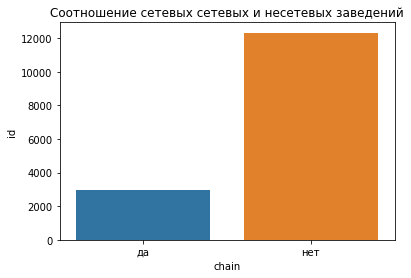

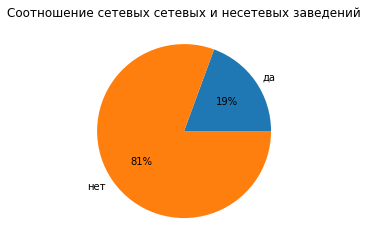

In [159]:
sns.barplot(x='chain', y='id', data=data.groupby('chain')['id'].count().reset_index())
plt.title('Соотношение сетевых сетевых и несетевых заведений')
plt.show()
plt.pie(x='id', data=data.groupby('chain')['id'].count().reset_index(), labels='chain', autopct='%.0f%%')
plt.title('Соотношение сетевых сетевых и несетевых заведений')
plt.show()

Сетевых заведений примерно в 4 раза меньше, чем несетевых

Посмотрим зависимость сетевого распространения от вида объекта

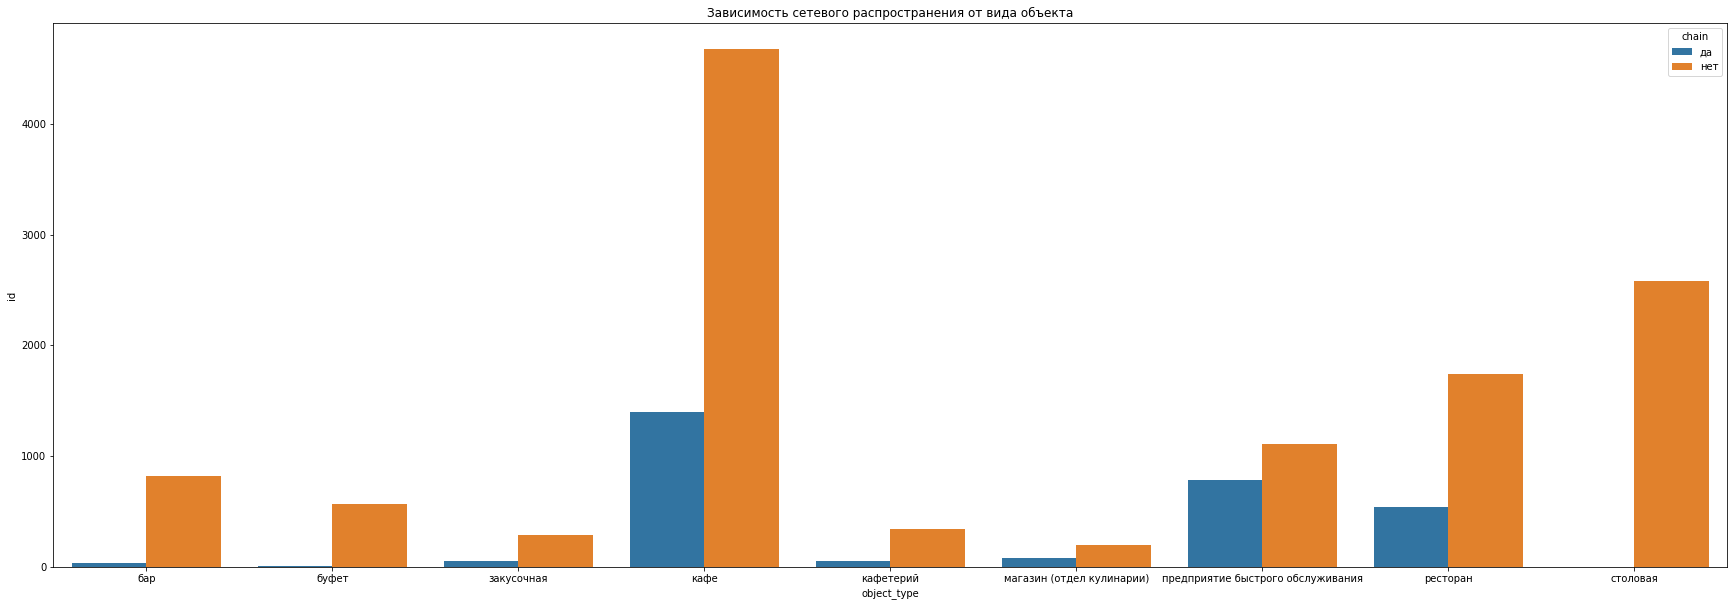

In [160]:
plt.figure(figsize=(30, 10))
sns.barplot(x='object_type', y='id', data=data.groupby(['chain', 'object_type']).count()['id'].reset_index(), hue='chain')
plt.title('Зависимость сетевого распространения от вида объекта')
plt.show()

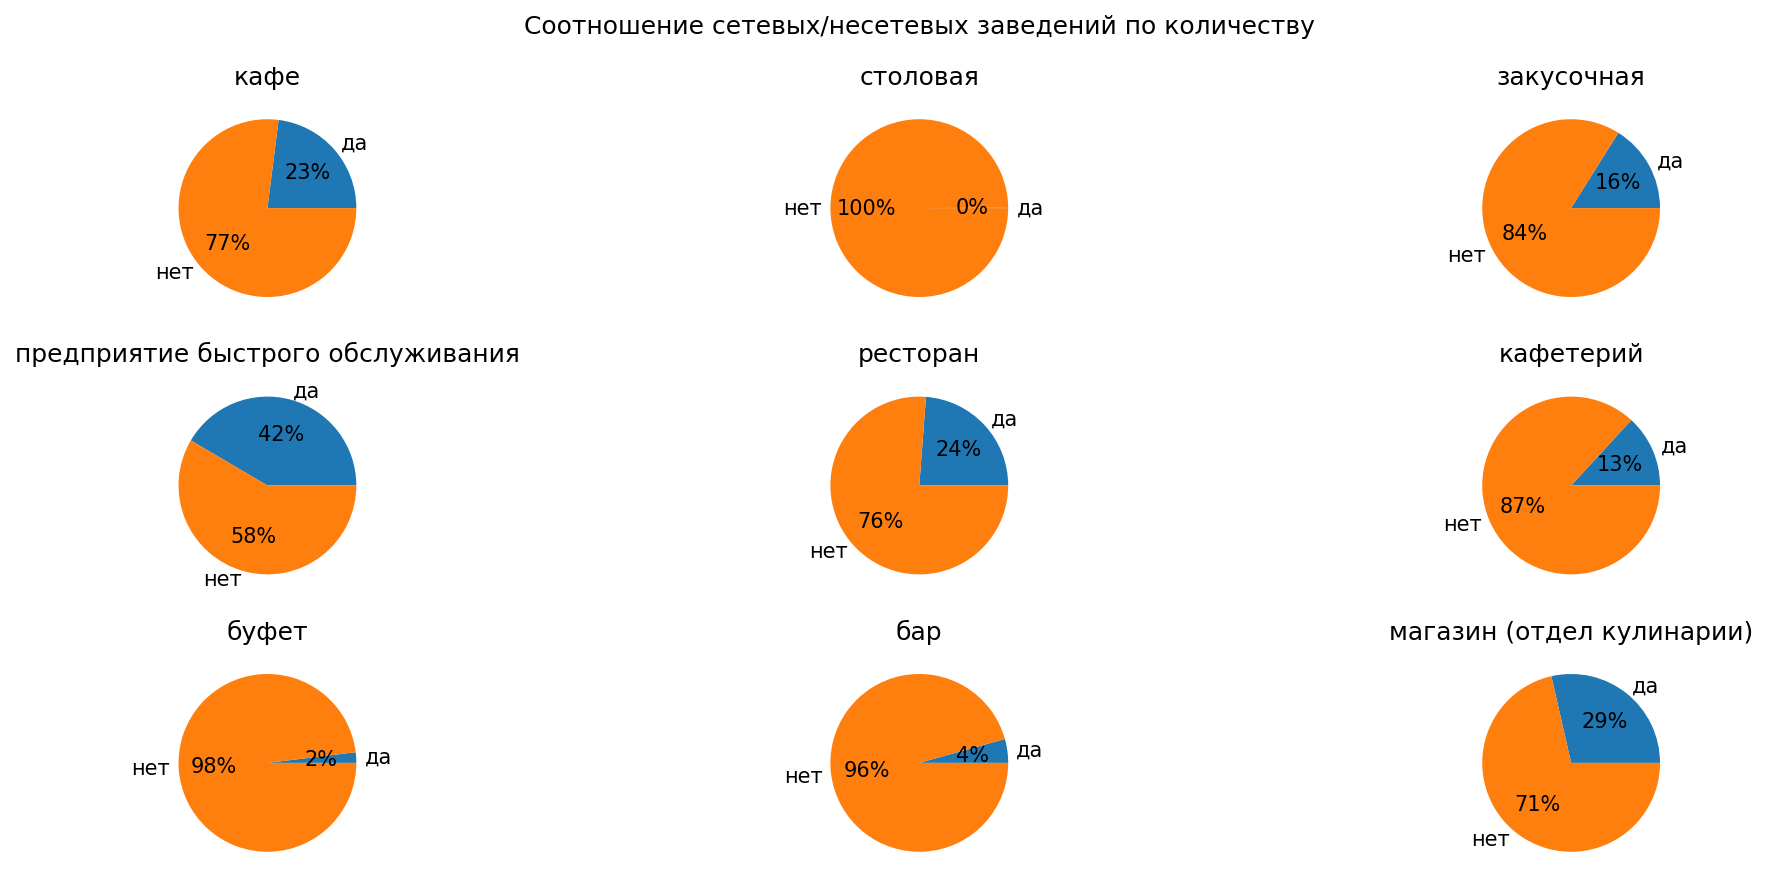

In [162]:
fig, axes = plt.subplots(int(np.ceil(data['object_type'].nunique() / 3)),3,figsize=(15,6), dpi=150)

for i,ax in zip(data['object_type'].unique(), axes.flat):
    ax.pie(x='id', data=data[data['object_type'] == i].groupby('chain')['id'].count().reset_index(), labels='chain', autopct='%.0f%%')
    ax.set_title(i)
    
    
fig.suptitle('Соотношение сетевых/несетевых заведений по количеству')
plt.tight_layout()
plt.show()

Сетевое распространение в большей степени характерно для предприятий быстрого обслуживания.

Узнаем что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [164]:
temp = data[data['chain'] == 'да'].pivot_table(index=['object_name'], values='number', aggfunc=['count','mean'])
temp.columns = temp.columns.droplevel(1)
temp = temp.query('count > 1')
print(temp)

                    count        mean
object_name                          
bocconcino              3   66.666667
burger club             3   20.333333
coffeeshop company      4   47.250000
cofix                  25    9.600000
correas                 3   44.000000
...                   ...         ...
шоколадница           157   57.184713
штолле                 13   30.076923
якитория               38  117.157895
япоша                   2  105.000000
ёрш                     4  112.250000

[248 rows x 2 columns]


Определим какие сети считать маленькими/средними/большими (то же самое с посадочными местами)

In [165]:
np.percentile(temp['mean'], [33, 66])

array([25.80712766, 66.68533333])

Зададим функцию для автоматического определения категории заведения по размеру сети и количеству посадочных мест

In [166]:
def grouping(count):
    chain_cat = ['small', 'middle', 'big']
    if count < 3:
        return chain_cat[0]
    elif count < 10:
        return chain_cat[1]
    else:
        return chain_cat[2]
    
def grouping_seats(mean):
    seats_cat = ['small', 'middle', 'big']
    if mean < 26:
        return seats_cat[0]
    elif mean < 67:
        return seats_cat[1]
    else:
        return seats_cat[2]

Разбиваем на категории

In [167]:
temp['chain_cat'] = temp['count'].apply(grouping)
temp['seats_cat'] = temp['mean'].apply(grouping_seats)
temp = temp.sort_values(by=['count','mean'])
temp

,count,mean,chain_cat,seats_cat
object_name,,,,
my box,2,0.000000,small,small
wokker,2,0.000000,small,small
точка продажи готовой еды милти,2,0.000000,small,small
yogurt frenzy,2,2.000000,small,small
роснефть,2,3.000000,small,small
...,...,...,...,...
теремок,94,25.606383,big,small
бургер кинг,137,46.649635,big,middle
макдоналдс,150,87.700000,big,big


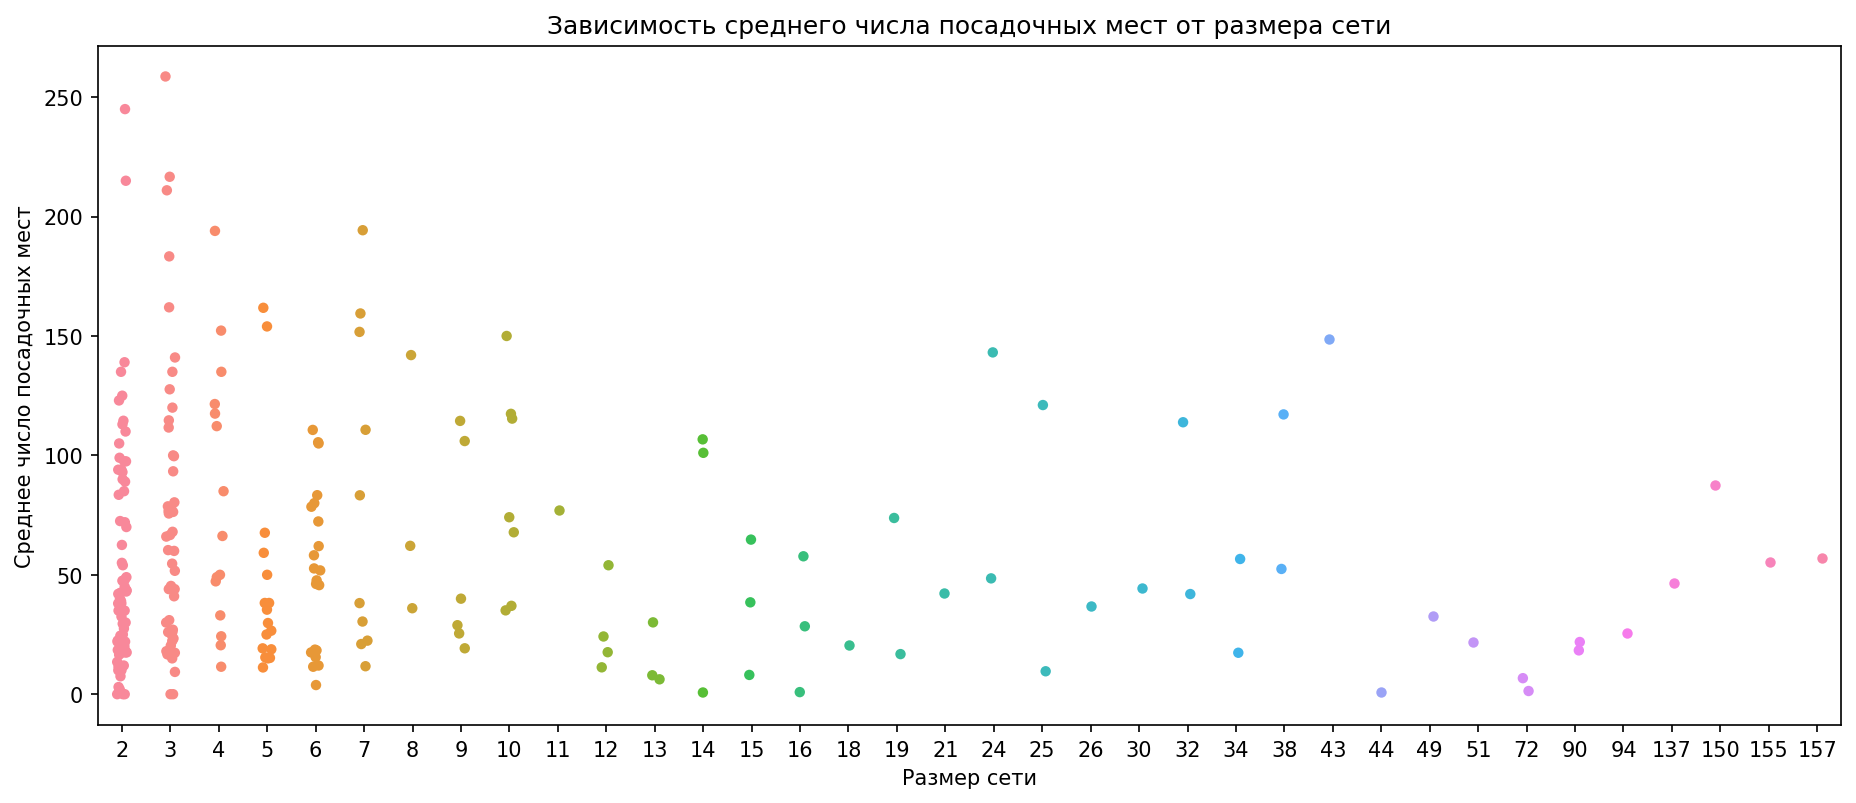

In [168]:
fig, ax = plt.subplots(figsize=(15,6), dpi=150)
sns.stripplot(x='count',y='mean',data=temp)
plt.xlabel('Размер сети')
plt.ylabel('Среднее число посадочных мест')
plt.title('Зависимость среднего числа посадочных мест от размера сети')
plt.show()

,chain_cat,seats_cat,count
8,small,small,30
7,small,middle,23
6,small,big,23
5,middle,small,33
4,middle,middle,40
3,middle,big,46
2,big,small,19
1,big,middle,19
0,big,big,15


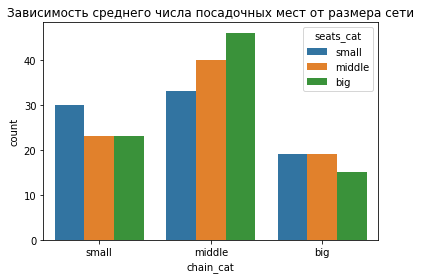

In [170]:
temp = temp.groupby(['chain_cat','seats_cat'])['count'].count().reset_index().sort_values(by=['chain_cat', 'seats_cat'], ascending=[False,False])
display(temp)
sns.barplot(x='chain_cat', y='count', data=temp, hue='seats_cat')
plt.title('Зависимость среднего числа посадочных мест от размера сети')
plt.show()

Наибольшее число сетей имеют от 3 до 10 заведений. Для маленьких сетей более характерно маленькое количество посадочных мест (<26), для средних сетей - средне-большое (>26 и <67). У больших сетей нет ярко-выраженного числа мест

Определим какой вид объектов общественного питания предоставляет в среднем самое большое количество посадочных мест

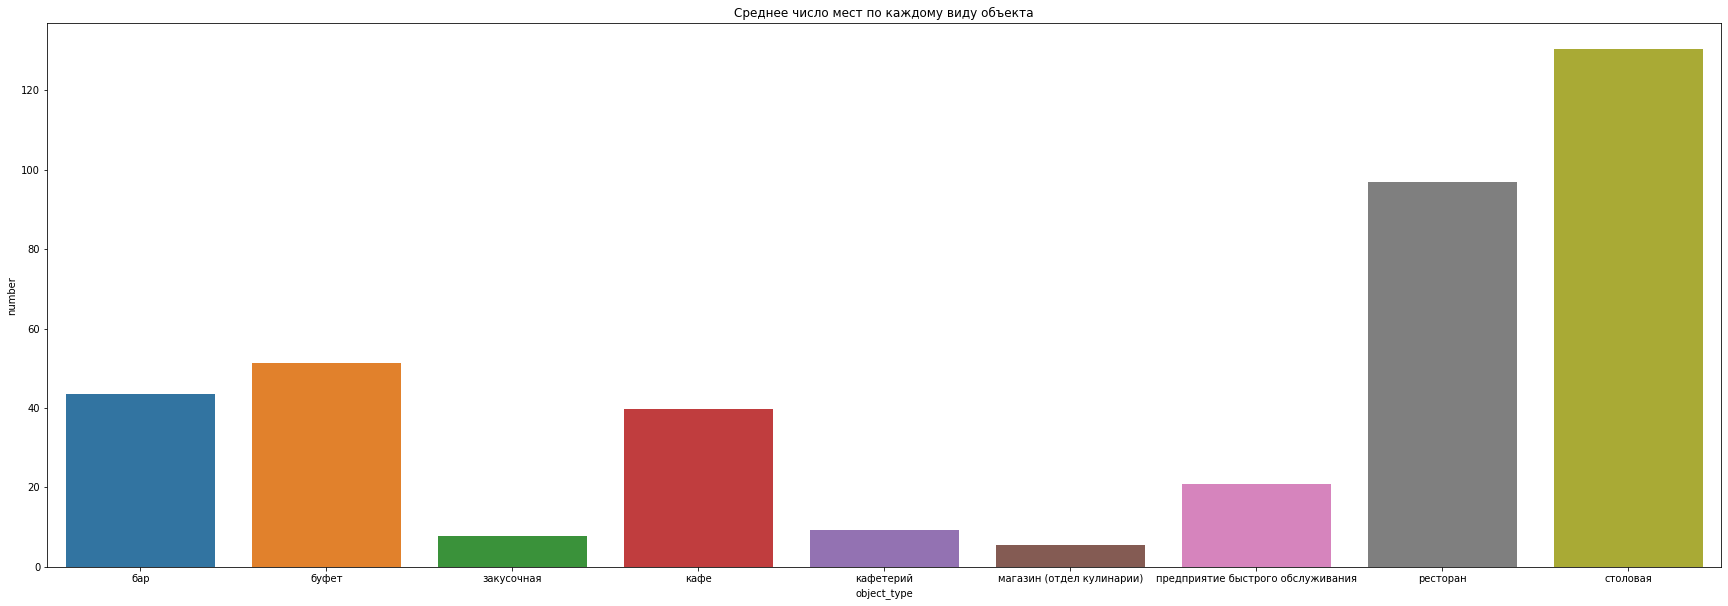

In [172]:
plt.figure(figsize=(30, 10), )
sns.barplot(x='object_type', y='number', data=data.groupby(['object_type'])['number'].mean().reset_index())
plt.title('Среднее число мест по каждому виду объекта')
plt.show()

В среднем наибольшое число посадочных мест предоставляются столовыми

Выделим информацию об улице в отдельный столбец

In [173]:
data['street'] = data['address'].str.split(",")
data['street'] = data['street'].apply(lambda x: x[1])

Определим топ-10 улиц по количеству объектов общественного питания

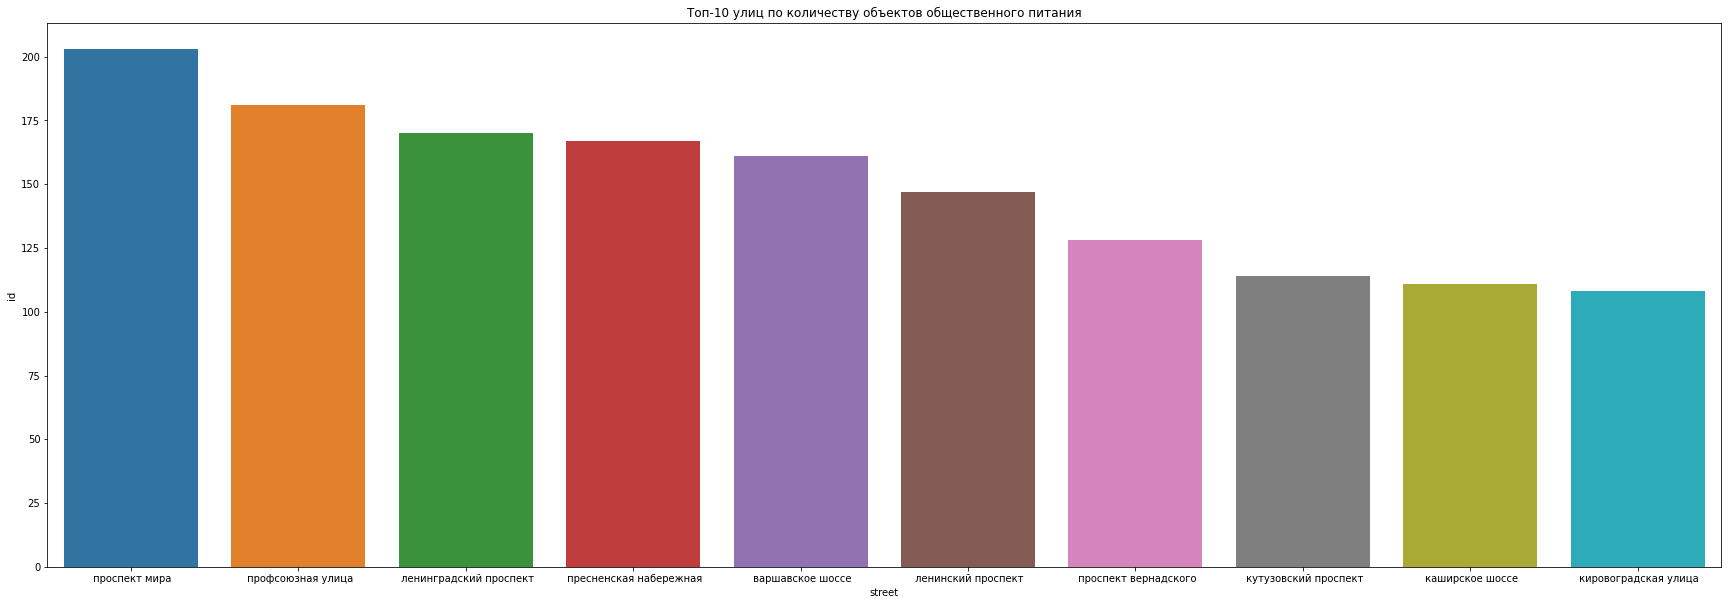

In [175]:
temp = data.groupby('street')['id'].count().reset_index().sort_values(by='id', ascending=False)
temp = temp.query('street != " город зеленоград" & street != " поселение сосенское"').head(10)
plt.figure(figsize=(30, 10))
sns.barplot(x='street', y='id', data=temp)
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.show()

In [176]:
from io import BytesIO
import requests
spreadsheet_id = '1fnMV4HGCE-K7PGtx6mGjv4zrsSBhiZbMyfR14WfgpMs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Адрес,Контактный телефон,Число посадочных мест,Показатель социальных льгот,Долгота в WGS-84,Широта в WGS-84,geodata_center,geoarea
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48,нет,37.7145650004360390,55.8790015313033730,NaN,NaN
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35,нет,37.6733061300344000,55.7382386551547000,NaN,NaN
3,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,95,нет,37.6696475969381000,55.7355114718314000,NaN,NaN
4,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,240,нет,37.5669400000000020,55.9040188006692200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19728,00365961,Каравай СВ,2383175413,нет,NaN,кафетерий,Северо-Восточный административный округ,Алексеевский район,"Российская Федерация, город Москва, внутригоро...",NaN,0,нет,37.6379209999999840,55.8060227719679460,"{""coordinates"":[37.637921,55.8060227719679],""t...",NaN
19729,00365954,Скалка,2383175414,нет,NaN,кафетерий,Северо-Восточный административный округ,Алексеевский район,"Российская Федерация, город Москва, внутригоро...",NaN,0,нет,37.6558609999999940,55.8231707769724680,"{""coordinates"":[37.655861,55.8231707769725],""t...",NaN
19730,00365882,Cofix,2383180529,да,Cofix,закусочная,Восточный административный округ,район Сокольники,"город Москва, Русаковская улица, дом 31",NaN,2,нет,37.6786070000000000,55.7884727668539500,"{""coordinates"":[37.678607,55.7884727668539],""t...",NaN
19731,00365894,ПРАВDА Кофе,2383181522,да,ПРАВDА Кофе,кафетерий,Центральный административный округ,Тверской район,"Российская Федерация, город Москва, внутригоро...",NaN,0,нет,37.6201610000000030,55.7698977614499190,"{""coordinates"":[37.620161,55.7698977614499],""t...",NaN


In [177]:
district = df[['District', 'Address']]
district.columns = ['district', 'address']
district['district'] = district['district'].str.lower()
district['address'] = district['address'].str.lower()
district = district.drop([0])
district

/tmp/ipykernel_325/501151208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district['district'] = district['district'].str.lower()
/tmp/ipykernel_325/501151208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district['address'] = district['address'].str.lower()


,district,address
1,ярославский район,"город москва, улица егора абакумова, дом 9"
2,таганский район,"город москва, улица талалихина, дом 2/1, корпус 1"
3,таганский район,"российская федерация, город москва, внутригоро..."
4,район лианозово,"город москва, угличская улица, дом 17"
5,район арбат,"город москва, переулок сивцев вражек, дом 6/2"
...,...,...
19728,алексеевский район,"российская федерация, город москва, внутригоро..."
19729,алексеевский район,"российская федерация, город москва, внутригоро..."
19730,район сокольники,"город москва, русаковская улица, дом 31"
19731,тверской район,"российская федерация, город москва, внутригоро..."


In [178]:
district = district.drop_duplicates().reset_index(drop=True)
district['street'] = district['address'].str.split(",")
district['street'] = district['street'].apply(lambda x: x[1])
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11221 entries, 0 to 11220
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  11221 non-null  object
 1   address   11221 non-null  object
 2   street    11221 non-null  object
dtypes: object(3)
memory usage: 263.1+ KB


In [179]:
temp = temp.merge(district, on='street', how='inner')

In [180]:
temp = temp.drop('address',axis=1).drop_duplicates()
temp

,street,id,district
0,проспект мира,203,мещанский район
8,проспект мира,203,останкинский район
10,проспект мира,203,алексеевский район
23,проспект мира,203,район свиблово
27,проспект мира,203,район ростокино
...,...,...,...
465,каширское шоссе,111,район нагатино-садовники
471,каширское шоссе,111,район орехово-борисово северное
496,кировоградская улица,108,район чертаново южное
499,кировоградская улица,108,район чертаново центральное


In [182]:
temp = temp.groupby('district')['id'].count().sort_values(ascending=False)
temp

district
район чертаново центральное    2
район тёплый стан              2
донской район                  2
ломоносовский район            2
район нагатино-садовники       2
                              ..
останкинский район             1
нагорный район                 1
мещанский район                1
гагаринский район              1
хорошёвский район              1
Name: id, Length: 36, dtype: int64

Все улицы из топ-10, кроме пресненской набережной, находятся сразу в нескольких районах (в основном в САО, ЮЗАО, ЮАО и ЦАО)

Найдем число улиц с одним объектом общественного питания и определим район

In [183]:
temp = data.groupby('street')['id'].count().reset_index().query('id == 1')
temp

,street,id
2,1-й балтийский переулок,1
3,1-й басманный переулок,1
4,1-й ботанический проезд,1
7,1-й вешняковский проезд,1
9,1-й голутвинский переулок,1
...,...,...
1889,ялтинская улица,1
1890,янтарный проезд,1
1895,ясногорская улица,1
1898,яузский бульвар,1


Таблица расположения улиц с одним объектом общественного питания

In [184]:
temp = temp.merge(district, on='street', how='inner')
temp = temp.drop('address',axis=1).drop_duplicates()
temp

,street,id,district
0,1-й балтийский переулок,1,район аэропорт
1,1-й басманный переулок,1,красносельский район
2,1-й ботанический проезд,1,район свиблово
3,1-й голутвинский переулок,1,район якиманка
4,1-й кирпичный переулок,1,район соколиная гора
...,...,...,...
502,щёлковский проезд,1,район северное измайлово
503,электрический переулок,1,пресненский район
504,якиманский переулок,1,район якиманка
505,янтарный проезд,1,лосиноостровский район


In [185]:
pd.set_option('display.max_rows', None)
temp = temp.groupby('district')['id'].count().sort_values(ascending=False)
temp

district
таганский район               21
басманный район               19
район хамовники               18
тверской район                17
район сокольники              12
район арбат                   10
пресненский район             10
мещанский район               10
район замоскворечье            9
район южное бутово             9
район соколиная гора           9
можайский район                8
красносельский район           8
район хорошёво-мнёвники        7
район аэропорт                 7
район якиманка                 7
тимирязевский район            7
район богородское              7
район лефортово                6
район марьина роща             6
алексеевский район             6
район солнцево                 6
район щукино                   6
лосиноостровский район         5
дмитровский район              5
бабушкинский район             5
район свиблово                 4
район ростокино                4
район покровское-стрешнево     4
южнопортовый район             4
р

<h2>Вывод</h2>

В ходе данного проекта были исследованы виды объектов общественного питания, соотношение сетвых/несетевых объектов, количество посадочных мест и районы расположения заведений общественного питания. Считаю, что дать рекомендации по данным невозможно, т.к. невозможно оценить вероятную прибыль/количество клиентов и прочие параметры, связанные с экономикой. Все, что мы имеем, не показывает насколько популярны те или иные объекты/улицы/районы, насколько выгодно расположение на конкретной улице/в конкретном районе.

Презентация: https://disk.yandex.ru/i/2Jifp3WHPn6PHQ